In [1]:
import scipy.stats as stats
from scipy.integrate import quad
import scipy
import numpy as np
import pandas as pd
import time
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
#load the parameters, and their short int feats?
parameters = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_266.csv", index_col =0 )
#parameters.head(5)
parameters[parameters["Gamma"]<1][:10]
print parameters["Location"].max()

7.98312466289


In [3]:
short_feats = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col =0 )
short_feats.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
0,0000000.bin,10000.0,1.346025e-08,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,...,4.410404,0.297364,0.016641,0.339655,0.010871,2.681898e-11,0.395531,0.0,1.235644e+07,1.099985e-04
1,0000001.bin,10000.0,8.934681e-10,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,...,0.588028,0.115674,0.039718,0.251880,0.137917,-9.314702e-11,0.403877,0.0,1.348749e+05,1.388587e-08
2,0000002.bin,10000.0,3.169983e-08,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,...,0.875622,0.038930,0.002380,0.026117,0.007227,-4.095504e-11,0.397334,0.0,1.276381e+04,3.048261e-04
3,0000003.bin,10000.0,6.097589e-10,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,...,9.650551,0.514386,0.003658,0.301072,0.279903,-7.257099e-12,0.391764,1.0,1.000000e+09,6.492574e-10
4,0000004.bin,10000.0,5.951220e-03,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,...,0.154157,0.496372,0.248052,1.358604,0.261358,-2.610208e-08,0.402905,0.0,8.791888e+01,9.336734e-07


In [4]:
subsystem = parameters["ID"].values.astype(int)
#print subsystem
sub_short = short_feats.loc[subsystem]
sub_short.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


#do a check how manysytems are valid, as we are only considering systems with an instability time range between 10^4 to ~10^6 (<\10^7), but there are some with lower time scales

In [5]:
discard = sub_short[sub_short["instability_time"]<10000]
print discard.index
print discard.shape, sub_short.shape
discard

Int64Index([13362, 2008, 2105, 2128, 22032, 24013, 2612, 4641, 58, 7341, 8582], dtype='int64')
(11, 126) (266, 126)


,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
13362,0013362.bin,10000.000000,0.000321,15.180236,11.189947,-6.526938,32.075308,-1.758383,17.267010,-23.963283,...,2.388276,0.157065,0.018752,0.211224,0.003627,-5.543712e-10,0.350045,0.0,74.822493,5.935752e-08
2008,0002008.bin,10000.000000,0.001348,9.648130,2.145408,1.289986,11.389790,6.914694,4.494719,4.653474,...,0.030574,0.640889,0.373052,0.227041,0.006782,-1.067556e-08,0.337121,0.0,195.093640,1.324071e-06
2105,0002105.bin,10000.000000,0.091443,19.063635,3.436111,15.067219,27.800055,30.988660,18.261569,-2.304971,...,0.514317,2.447895,1.042210,7.464887,0.097789,7.777267e-07,0.395936,0.0,142.928813,3.060674e-06
2128,0002128.bin,9899.755103,0.001129,9.928947,1.485805,7.374275,11.839157,3.357271,5.066631,-4.212845,...,0.945496,1.132426,0.423725,3.547770,0.118831,6.977274e-08,0.385283,0.0,169.325268,1.658549e-06
22032,0022032.bin,9768.838945,0.016778,8.166863,13.073396,-8.465782,50.110106,17.832222,8.185106,-4.642923,...,0.087702,0.113300,0.039438,0.375961,0.115814,-6.031261e-10,0.413043,0.0,79.465169,1.199905e-05
24013,0024013.bin,10000.000000,0.055335,-4.408785,11.108835,-19.456597,11.933935,35.467347,38.363735,-5.001899,...,0.253701,1.189934,0.825351,4.201093,0.150344,-4.184932e-08,0.380108,0.0,92.075319,1.584756e-06
2612,0002612.bin,10000.000000,0.000008,8.283632,1.799103,3.160358,12.522809,14.883222,0.167518,14.707546,...,1.883693,0.125546,0.001741,0.482498,0.468737,-1.786871e-10,0.403102,0.0,575.317901,1.885941e-08
4641,0004641.bin,10000.000000,0.001398,5.860893,2.747184,0.724268,13.474425,25.025117,0.329004,24.112284,...,0.173387,0.043891,0.034162,0.103647,0.003224,6.031947e-12,0.404600,0.0,283.917037,3.190056e-06
58,0000058.bin,9918.423509,0.000250,27.792111,6.878077,16.112694,49.326185,2.959052,4.440089,-9.942672,...,2.523245,1.318133,0.087513,0.265713,0.025384,5.318945e-09,0.385044,0.0,5325.868318,1.959029e-08
7341,0007341.bin,9763.030115,0.001757,5.670086,8.931890,-15.126648,13.668682,15.729751,11.317428,-2.511966,...,0.255632,0.366331,0.355547,2.392509,0.026282,1.341146e-07,0.362352,0.0,583.527458,5.372349e-08


In [6]:
#need to do a double integral

def weib(loc, loc_fixed, gamma, alpha, x):
    #assume x is log t
    prob = (gamma/alpha)* ((loc-loc_fixed)/alpha)**(gamma-1.) * np.exp(-((loc-loc_fixed)/alpha)**gamma)
    dist = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    return prob*dist

In [7]:
#need to do a double integral
#x must be an ARRAY
def weib_pdf(x, loc,  gamma, alpha):
    #assume x is log t
    problematic = np.where(x<loc)[0]
    #print problematic
    fine = np.where(x>loc)[0]
    #print fine
    prob = np.zeros_like(x)
    #print x[fine]
    #includes normalization constants
    prob[fine] = (gamma/alpha)* ((x[fine]-loc)/alpha)**(gamma-1.) * np.exp(-((x[fine]-loc)/alpha)**gamma)
    #print prob[fine]
    prob[problematic]=0.
    #width = np.abs(x[0] - x[1])
    #prob = prob/(np.sum(prob)*width)
    return prob

In [8]:
#need to do a double integral
#x can be int or aray, but has poor error handling
def weib_pdf_val(x, loc,  gamma, alpha):
    #assume x is log t  
    prob = (gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)
    #print prob[fine]
    return prob

In [9]:
#2.61402658322 1.28337089098 4.44752697372
gamma = 2.61402658322
alpha = 1.28337089098
loc = 4.44752697372
x = 4.5
(gamma/alpha)* ((x-loc)/alpha)**(gamma-1.) * np.exp(-((x-loc)/alpha)**gamma)

0.011692716127467438

In [10]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [11]:
print parameters[parameters["ID"] ==1235.0]

        ID     Gamma  Location     Alpha
26  1235.0  2.299784  4.430103  0.773949


2.29978439031 0.773949050428 4.43010295354 4.61069634856


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


1.05280450908
1.10532645859
1.14860326086
1.1821822678
1.20579832922
1.21937493495
1.22302067616
1.2170210694
1.20182599315
1.17803317088
1.14636829116
1.10766247931
1.06282792231
1.0128324971


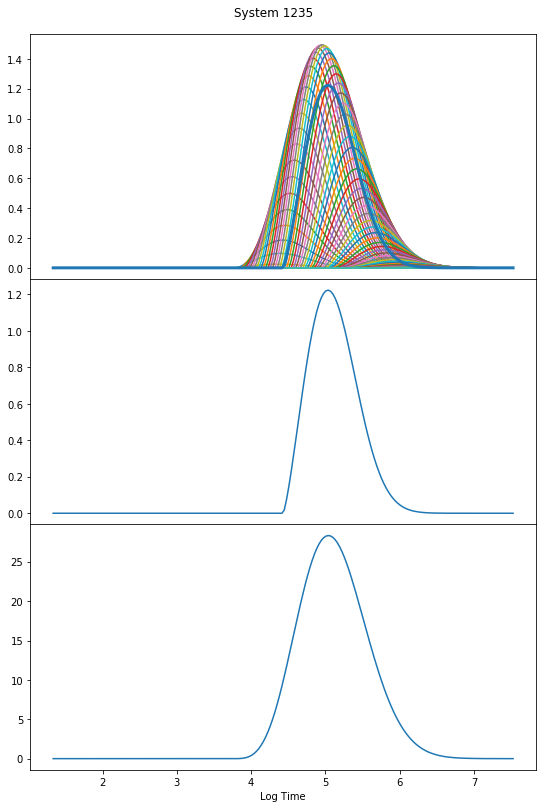

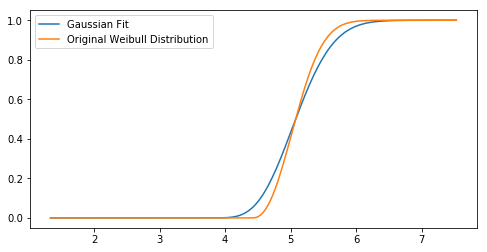

In [12]:

index_val = 26
#print 
label = parameters["ID"][index_val]
#print label
gamma = parameters["Gamma"][index_val]
alpha = parameters["Alpha"][index_val]
loc = parameters["Location"][index_val]
x = np.log10(sub_short["instability_time"].values[index_val])
print gamma, alpha, loc, x 
from scipy.stats import norm
#fig = plt.figure(figsize=(8,12))
fig, (ax, ax2, ax3) = plt.subplots(3)
fig.tight_layout()
fig.set_size_inches((8, 12))
fig.suptitle("System {0}".format(int(label)))

fig.subplots_adjust(hspace=0)
#ax = fig.add_subplot("311")
width = 200

sigma_width = 4

vals= np.linspace(loc- sigma_width*alpha, loc+alpha*sigma_width, width)
final_y  = np.zeros(width)
for i in range(int(vals.shape[0])):
    
    #try manually adding three different functions
    bins = np.linspace(loc - sigma_width*alpha , loc+sigma_width*alpha, width)
    val1 = vals[i]
    exp_val = alpha*scipy.special.gamma(1+ 1./gamma)
    #print exp_val+loc
    #print val1, loc, gamma, alpha
    prob = weib_pdf_val(val1, loc-exp_val, gamma, alpha)
    if prob>1:
        print prob
    #print prob
    
    y_normal = weib_pdf(bins, val1, gamma, alpha)
    #fair to say that new distribtions shouldn't be more likely than the real distribution  
    y = prob*weib_pdf(bins, val1,gamma, alpha)
    #if y[i]> y_normal[i]:
    #    y = y / (y[i]/y_normal[i])
    #y = yprob *weib_pdf(bins, val1,gamma, alpha)
    ####y = prob*weib_pdf(bins, val1,gamma, alpha)
    #print prob, val1

    #print y
    #if (i%5 ==4):
    ax.plot(bins, y)
    
    final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #print y[:10]
    #print final_y[:10]
    #break
    
    
#ax2 = fig.add_subplot("312")
ax2.plot(bins, weib_pdf(bins, loc,gamma, alpha))
#ax3 = fig.add_subplot("313")
ax.plot(bins, weib_pdf(bins, loc,gamma, alpha), linewidth = 3)

final_y 
#print final_y
ax3.plot(bins, final_y)
ax3.set_xlabel("Log Time")


#plot cdf of original distribution
plt.figure(figsize=(8, 4))
cumul_y = np.cumsum(final_y)
cumul_w = np.cumsum(weib_pdf(bins, loc,gamma, alpha))
plt.plot(bins, cumul_y/cumul_y[-1], label = "Gaussian Fit")
plt.plot(bins, cumul_w/cumul_w[-1], label = "Original Weibull Distribution")
plt.legend()

In [13]:
def rms_error(y_true, y_test):
    #assume the two are the same size, do a rsm error
    error = 1./2**0.5 *(y_true-y_test)
    return np.nansum(error)


[ 28.49618568   5.07821749   0.45129762]
16.0698110481
16.1179463039


0.96794703439927687

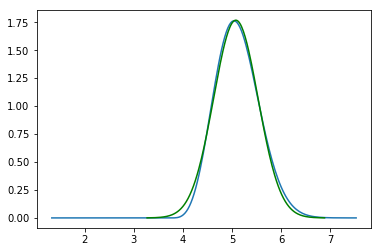

In [14]:
p0 = [1., loc+alpha*sigma_width, alpha] #norm, mean, sigma
coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)

#gauss_bins = np.linspace(loc-5*alpha , loc+7*alpha, width)

# Get the fitted curve
#bins = np.linspace(loc , loc+7*alpha, width)
gauss_bins = np.linspace(loc-5*sigma_width , loc+7*sigma_width, width)

print coeff
#print bins[:10]
#print gauss_bins[:10]

hist_fit = gauss(bins, *coeff)
hist_fit2 = gauss(gauss_bins, *coeff)
#incrementing step
delta_t = (( loc+sigma_width*alpha) -loc)/(width-1)

summed_fit_area_weib = 0
for val in final_y:
    summed_fit_area_weib+=  val*delta_t 
print summed_fit_area_weib


summed_fit_area_gauss = 0
for val in hist_fit:
    summed_fit_area_gauss+=  val*delta_t 
print summed_fit_area_gauss

#plot normalized curves for visual inspection
plt.plot(bins, final_y/summed_fit_area_weib)
#plt.plot(bins, hist_fit/summed_fit_area_gauss)
#plt.plot(bins, hist_fit2/summed_fit_area_gauss)
test_bins = np.linspace(coeff[1] - sigma_width*coeff[2], coeff[1] + sigma_width*coeff[2], width)
plt.plot(test_bins, gauss(test_bins, *coeff)/summed_fit_area_gauss, color = "green")


overlapp = np.concatenate([(final_y/summed_fit_area_weib).reshape(width,1), 
                           (hist_fit/summed_fit_area_gauss).reshape(width, 1)], axis = 1)
overlapp.min(axis = 1).sum()*delta_t


Try doing this for all 145 systems

In [15]:
import time

In [57]:
start = time.time()
info = np.zeros((parameters.shape[0], 7)) # add norm const, RMS
corrupted = []
for index_val in range(int(parameters.shape[0])):
    width = 150 #incremental step

    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot("121")
    ax2 = fig.add_subplot("122")
    #print index_val, 
    gamma = parameters["Gamma"][index_val]
    alpha = parameters["Alpha"][index_val]
    loc = parameters["Location"][index_val]
    #print gamma, alpha, loc
    x = np.log10(sub_short["instability_time"].values[index_val])
    #print "Spread", alpha
    #print gamma, alpha, loc, x 
    vals= np.linspace(loc-alpha*sigma_width, loc+alpha*sigma_width, width)
    exp_val = alpha* scipy.special.gamma(1+1./gamma)
    #print loc +exp_val
    final_y  = np.zeros(width)
    for i in range(int(vals.shape[0])):
        bins = np.linspace(loc-alpha*sigma_width , loc+sigma_width*alpha, width)
        val1 = vals[i]
        #get the entire pdf
        prob = weib_pdf_val(val1, loc-exp_val, gamma, alpha)
        #get the probability that time being drawn
        y = prob*weib_pdf(bins, val1,gamma, alpha)
        ax.plot(bins, y)#just to prevent any errors
        final_y = np.nansum(np.asarray([y, final_y]), axis = 0)  #np.nansum(a=[y, final_y], axis= 1)
    #plt.figure(figsize=(12, 8))
    ax2.plot(bins, final_y)    
    p0 = [1., loc+alpha*scipy.special.gamma(1+ 1./gamma), alpha] #norm, mean, sigma
    #popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    try:
        coeff, var_matrix = scipy.optimize.curve_fit(gauss, bins, final_y, p0=p0)
        #print var_matrix
        perr = np.sqrt(np.diag(var_matrix))
        plt_title = 'Convolution Parameters For System {4}: Mean: {0:.5} E {2:.4}   Sigma: {1:.5} E: {3:.4}'.format(coeff[1], np.abs(coeff[2]), perr[1], perr[2], sub_short.index[index_val])
        #print "Coefs: Mean, Sigma", coeff[1:], "Error", perr[1:]
        #fit can cbe calculated
        delta_t = (( loc+sigma_width*alpha) -loc - 0.0001)/(width-1)
        summed_fit_area_weib=0
        summed_fit_area_gauss = 0


        ###########################Error calcualtion###############################
    
        # Get the fitted curve
        hist_fit = gauss(bins, *coeff)


        #find the total sum of final_y to find normalizing constant
        summed_fit_area_weib = np.sum(final_y)*delta_t
        summed_fit_area_gauss = np.sum(hist_fit)*delta_t


        overlapp = np.concatenate([(final_y/summed_fit_area_weib).reshape(width,1), 
                                   (hist_fit/summed_fit_area_gauss).reshape(width, 1)], axis = 1)
        #define IOU as the sum, of their overlap, so take the min of both and sum it multiplied by delta t 
        IOU = overlapp.min(axis = 1).sum()*delta_t
        #overlapped area
        print IOU, sub_short.index[index_val]

        ###########################################################################   
        info[index_val] = [sub_short.index[index_val], coeff[0], coeff[1], perr[1], coeff[2], perr[2], IOU]

    except Exception as e:
        print e
        corrupted.append(sub_short.index[index_val] )
        info[index_val] = [sub_short.index[index_val],np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]
        plt_title = 'Convolution Parameters For System {0}'.format(sub_short.index[index_val])
    
    
    
    
    
    plt.suptitle(plt_title)
    #plt.show()
    plt.savefig("../../Figures/ConvolutedFigures/{0}.png".format(sub_short.index[index_val]))
    plt.close()
    #print sub_short.index[index_val]
    #break
    #hist_fit = gauss(bins, *coeff)
    #plt.plot(bins, hist_fit/summed_fit_area_gauss)
    #plt.plot(bins, final_y/summed_fit_area_weib)
    #print info[index_val]
    #break
end = time.time()
print end-start


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


0.978693954875 1007
0.993032643791 1021
0.9658901847 1025
0.946054979898 1041
0.927473062199 10518
0.99388629666 1052
0.935577242337 1107
0.990017576919 1120
0.875356370019 1124
0.970808715708 1128
0.993191386352 1136
0.958464881645 1137
0.935504174676 1138
0.976606812112 1169
0.993698992222 1174
0.96612906432 1190
0.924411534036 1194
0.979808233347 1197
0.992403902502 1
0.979559867593 1204
0.965218985333 1206
0.918301009176 12073
0.989040765944 1208
0.982796746431 1217
0.907262640727 1223
0.910264147843 1230
0.967874807298 1235
0.957005059412 1237
0.962649601556 1241
0.951708626215 1248
0.979938020724 1251
0.992748595381 1261
0.944123019734 1266
0.988931484895 1270
0.873252012659 1277
0.96597388519 12840
0.89375764174 1308
0.949083747022 1313
0.990495656833 1323
0.978695557585 1324


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:59: RuntimeWarning: invalid value encountered in divide


nan 13362
0.978102859228 1337
0.966257895536 1344
0.968012613777 1350
0.897312365161 1356


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in sqrt


0.065014556248 1364
0.897919790942 1366
0.984779164925 1375
0.973206930068 1379
0.911407064641 1396
0.979311790718 1403
0.970379873637 1408
0.982633084709 1412
0.950035661692 1424
0.94982652287 1426
0.967364717479 1438
0.827039048795 1449
0.964955544487 1476
0.946877484336 1488
0.966401826806 15003
0.958710887103 1504
0.936631568 1507
0.802328460917 1508
0.993464505605 1513
0.979703942197 1514
0.982296239466 15220
0.992045138642 1590
0.928181341191 1598
0.831905786071 1601
0.960356324987 1613
0.993790723199 1616
0.944850284476 1617
0.973373466763 1625
0.974613330128 1627
0.983980741012 1635
0.961858975283 1636
0.877439865636 1640
0.984192991726 1646
0.984682464478 1648
0.985574469504 1657
0.978393857103 16588
0.96456617074 1667
0.926226063664 1675
0.972104024204 1689
0.964827972285 1691
0.90385056083 1720
0.933153555368 1742
0.966984968957 1753
0.977618530428 17641
0.961117687569 1766
0.9932906684 1768
0.95288500905 1775
0.944432159852 1785
0.984632977561 1791
0.958793855521 1796
0.968

/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in power
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in divide


nan 787
0.959082583573 8462
nan 8582
0.81206866695 8744
0.930489536868 91


/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
/home/naireen/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in multiply


array must not contain infs or NaNs
159.0500741


The ones that failed were the exp dists with very low values of gamma, because even after convoluting them, they remain an exponential (as expected)

In [58]:
np.savetxt("../../../Corrupted_small.txt", corrupted)
print corrupted
print np.loadtxt("../../../Corrupted.txt")
#np.savetxt("../../../Corrupted.txt", corrupted )


[99]
[ 13362.   1364.   1424.   1508.   1886.   2059.   2105.  22032.  24013.
   4641.   7341.   8582.]


In [59]:
info_frame = pd.DataFrame(info, columns=["ID", "Norm","Mean" , "Mean_Error", "Sigma", "Error", "IOU"])
print info_frame.shape
#info_frame.to_csv("../../Figures/ConvolutedFigures/Convolved_Params_266_IOU.csv")
info_frame.head()

(266, 7)


,ID,Norm,Mean,Mean_Error,Sigma,Error,IOU
0,1007.0,8.632038,5.550344,0.002733,0.673654,0.002733,0.978694
1,1021.0,13.452139,5.995308,0.000645,0.491396,0.000645,0.993033
2,1025.0,14.246348,5.747612,0.003600,0.557004,0.003600,0.965890
3,1041.0,11.327462,5.634287,0.006886,0.672150,0.006886,0.946055
4,10518.0,16.300456,6.353353,0.008217,0.591566,0.008217,0.927473


One really weird system seen below that for some reason it is able to fit a guassian, but it clearly isn't and to it gets really weird values and a sigma of 10^7, this should be ignored. Thus, the total number of systems we have left that are valid are 249

Edit: THis is because there is a very narror distribution there, and it seems to think it represents a really wide gaussian. (the distribution we have looks like it could be a tail of a gaussian). There was also an additional cut added to ensure that the mu was always positive, as it should be, because it otherwise doesn't make sense. 

        ID          Norm      Mean  Mean_Error         Sigma     Error  IOU
260  787.0 -8.710887e-20  7.788361    0.002008  1.557709e+07  0.002014  NaN
(266, 7)


(array([ 994.,    1.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 4.6868332 ,  4.81068076,  4.93452833,  5.0583759 ,  5.18222346,
         5.30607103,  5.4299186 ,  5.55376616,  5.67761373,  5.8014613 ,
         5.92530887]),
 <a list of 10 Patch objects>)

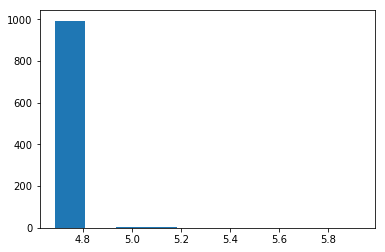

In [64]:
#reload csv
info_frame = pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_266_IOU.csv", index_col=0)
print info_frame[(info_frame["Sigma"]>10)& (info_frame["Sigma"]!=np.inf)]
print info_frame.shape
#valid_info_frame= info_frame[(info_frame["Mean"]!=np.inf) & (info_frame["Sigma"]<10) & (info_frame["Mean"]>4)] #need to see what causes this
#valid_info_frame = valid_info_frame[valid_info_frame["ID"]!=1364]
#This system converged when running everything, but not on the individual testing, I wonder
# if that is due to slightly different parameters between the two
#print valid_info_frame.shape
weird_data = pd.read_csv("../../../Long300/Sys_1364_1e8.csv")
plt.hist(np.log10(weird_data["t"]))

In [65]:
#system 787 is weird, high sigma value
#In [7]: df[df['A'].isin([3, 6])]
#print valid_info_frame.head()
print valid_info_frame.shape
valid_info_frame = valid_info_frame[~valid_info_frame["ID"].astype(int).isin(discard.index)]
print valid_info_frame.shape
valid_info_frame = valid_info_frame[~valid_info_frame["ID"].astype(int).isin(corrupted)]
print valid_info_frame.shape
print discard.index
print corrupted
#print valid_info_frame.shape
##print discard.index
print valid_info_frame.shape
print valid_info_frame["Sigma"].max()
print valid_info_frame.shape[0], "out of", info_frame.shape[0]
ind =  np.where(valid_info_frame["Sigma"] == valid_info_frame["Sigma"].max())[0][0]
#info_frame = pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_266_IOU.csv")
valid_info_frame.to_csv("../../Figures/ConvolutedFigures/Convolved_Params_247_IOU_valid.csv")
print valid_info_frame["Mean"].min()

(242, 7)
(242, 7)
(242, 7)
Int64Index([13362, 2008, 2105, 2128, 22032, 24013, 2612, 4641, 58, 7341, 8582], dtype='int64')
[99]
(242, 7)
1.491132328
242 out of 266
4.01145443208


(242, 7)
['ID' 'Norm' 'Mean' 'Mean_Error' 'Sigma' 'Error' 'IOU']


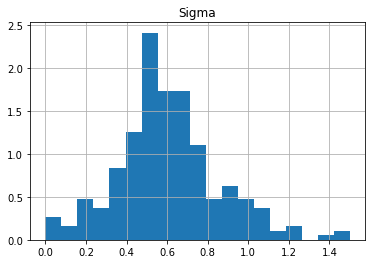

In [66]:
valid_info_frame= pd.read_csv("../../Figures/ConvolutedFigures/Convolved_Params_247_IOU_valid.csv", index_col=0)
print valid_info_frame.shape
valid_info_frame["Sigma"] = np.abs(valid_info_frame["Sigma"])
bins = np.linspace(0, 1.5, 20)
valid_info_frame.hist("Sigma",  normed = 1, bins = bins)
print valid_info_frame.columns.values

Average Sigma 0.604497901009 Std in Sigma 0.250088095665
(242, 7)


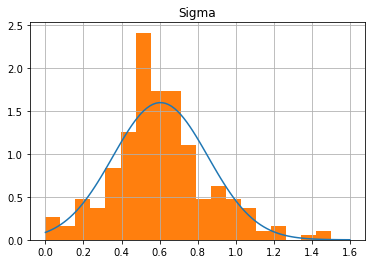

In [67]:
from scipy.stats import norm

mu_fit, sig_fit =  norm.fit(valid_info_frame["Sigma"].values)
print "Average Sigma", mu_fit, "Std in Sigma", sig_fit
#x, xmax = plt.xlim()
fig = plt.figure()
ax = fig.add_subplot("111")
x = np.linspace(0, 1.6, 100)
p = norm.pdf(x, mu_fit, sig_fit)
plt.plot(x, p)
valid_info_frame.hist("Sigma", normed = 1, ax = ax, bins = bins)
print valid_info_frame.shape

#with 249, including everything with positive mu
#Average Sigma 0.60923291473 Std in Sigma 0.254849811744

0.788354447087


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2098bf46d0>]], dtype=object)

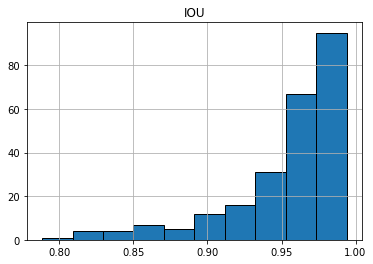

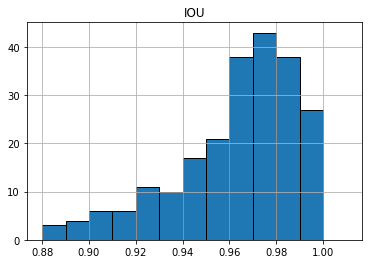

In [68]:
bins = np.linspace(0.88,1.01, 14)
#print valid_info_frame[valid_info_frame["IOU"] < 0.9]
valid_info_frame.hist("IOU", edgecolor = "black", linewidth = 1)
print valid_info_frame["IOU"].min()
valid_info_frame.hist("IOU", edgecolor = "black", linewidth = 1, bins = bins)

In [44]:
print valid_info_frame.shape

(242, 7)
